# [30 Examples to Master Pandas](https://towardsdatascience.com/30-examples-to-master-pandas-f8a2da751fa4)

In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.__version__

'1.2.4'

### 1. Reading the csv file

In [3]:
df=pd.read_csv("data/Churn_Modelling.csv")

In [4]:
df.shape

(10000, 14)

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### 2. Dropping columns

In [6]:
df.drop(labels=['RowNumber', 'CustomerId', 'Surname', 'CreditScore'], 
       axis=1, inplace=True)
df.shape

(10000, 10)

```python
    df.drop(labels=['RowNumber', 'CustomerId', 'Surname', 'CreditScore'], 
       axis=1)
```
is equal to
```python
df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'CreditScore'],    inplace=True)
```

### 3. Select particular columns while reading

We can read only some of the columns from the csv file. The list of columns is passed to the `usecols` parameter while reading. It is better than dropping later on if you know the column names beforehand.

In [7]:
df_part=pd.read_csv("data/Churn_Modelling.csv", 
                    usecols=['Gender', 'Age', 'Tenure', 'Balance'])
df_part.head()

,Gender,Age,Tenure,Balance
0,Female,42,2,0.00
1,Female,41,1,83807.86
2,Female,42,8,159660.80
3,Female,39,1,0.00
4,Female,43,2,125510.82


### 4. Reading a part of the DataFrame
The read_csv function allows reading a part of the dataframe in terms of the rows. There are two options. The first one is to read the first n number of rows.

In [8]:
df_partial=pd.read_csv("data/Churn_Modelling.csv", nrows=1000)
df_partial.shape

(1000, 14)

Using the `nrows` parameters, we created a dataframe that contains the first 1000 rows of the csv file.
We can also select rows from the end of the file by using the `skiprows` parameter. `Skiprows`=1000 means that we will skip the first 1000 rows while reading the csv file.

### 5. Sample

After creating a dataframe, we may want to draw a small sample to work. We can either use the `n` parameter or `frac` parameter to determine the sample size.
* **n**: The number of rows in the sample
* **frac**: The ratio of the sample size to the whole dataframe size

In [9]:
df.shape

(10000, 10)

In [10]:
df_sample=df.sample(n=2000)
df_sample.shape

(2000, 10)

### 6. Checking the missing values

In [11]:
df.isna().sum()

Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### 7. Adding missing values using loc and iloc

In [12]:
missing_index=np.random.randint(low=10000, size=20)
df.loc[missing_index, ['Balance','Geography']]=np.nan

In [13]:
df.isna().sum()

Geography          20
Gender              0
Age                 0
Tenure              0
Balance            20
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
Exited              0
dtype: int64

In [14]:
df.iloc[missing_index, -1]=np.nan
df.isna().sum()

Geography          20
Gender              0
Age                 0
Tenure              0
Balance            20
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
Exited             20
dtype: int64

### 8. Filling missing values

The `fillna` function is used to fill the missing values. It provides many options. We can use a specific value, an aggregate function (e.g. `mean`), or the previous or next value.
For the geography column, I will use the most common value.

In [15]:
mode=df.Geography.value_counts()[0]
mode

5006

In [16]:
df.Geography.fillna(value=mode, inplace=True)

In [17]:
df.isna().sum()

Geography           0
Gender              0
Age                 0
Tenure              0
Balance            20
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
Exited             20
dtype: int64

Similarly, for the balance column, I will use the mean of the column to replace missing values.

In [18]:
avg = df['Balance'].mean()
df['Balance'].fillna(value=avg, inplace=True)

In [19]:
df.isna().sum()

Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
Exited             20
dtype: int64

### 9. Dropping missing values
Another way to handle missing values is to drop them. There are still missing values in the “Exited” column. The following code will drop rows that have any missing value.

In [20]:
df.shape

(10000, 10)

In [21]:
df.dropna(axis=0, how="any", inplace=True)

In [22]:
df.shape

(9980, 10)

The `axis`=1 is used to drop columns with missing values. We can also set a threshold value for the number of non-missing values required for a column or row to have. For instance, `thresh`=5 means that a row must have at least 5 non-missing values not to be dropped. The rows that have 4 or fewer missing values will be dropped.
The dataframe does not have any missing values now.

In [23]:
df.isna().sum().sum()

0

### 10. Selecting rows based on conditions

In some cases, we need the observations (i.e. rows) that fit some conditions. For instance, the below code will select customers who live in France and have churned.

In [24]:
france_churn=df[(df.Geography=="France") & (df.Exited==1)]
france_churn.Geography.value_counts()

France    809
Name: Geography, dtype: int64

In [25]:
france_churn.head()

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,France,Female,42,2,0.00,1,1,1,101348.88,1.0
2,France,Female,42,8,159660.80,3,1,0,113931.57,1.0
35,France,Female,45,0,134264.04,1,1,0,27822.99,1.0
41,France,Female,51,8,122522.32,1,0,0,181297.65,1.0
43,France,Female,49,2,131394.56,1,0,0,194365.76,1.0


### 11. Describing the conditions with query
The query function provides a more flexible way of passing the conditions. We can describe them with strings.

In [26]:
df2=df.query("80000 < Balance < 100000")
df2.head()

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,Spain,Female,41,1,83807.86,1,0,1,112542.58,0.0
31,France,Male,36,7,85311.70,1,0,1,156731.91,0.0
54,Germany,Male,42,1,98495.72,1,1,0,40014.76,1.0
69,France,Female,21,8,98373.26,1,1,0,18203.00,0.0
80,France,Female,34,1,96645.54,2,0,0,171413.66,0.0


<AxesSubplot:ylabel='Frequency'>

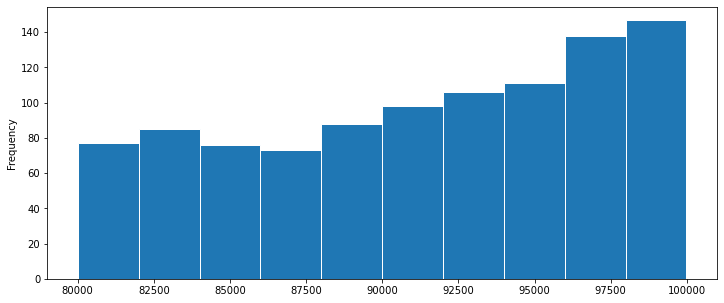

In [27]:
df2.Balance.plot(kind="hist", 
                 figsize=(12,5), 
                 edgecolor="white")

### 12. Describing the conditions with isin
The condition might have several values. In such cases, it is better to use the isin method instead of separately writing the values.
We just pass a list of the desired values.

In [28]:
df[df['Tenure'].isin([4,6,9,10])][:3]

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,Germany,Female,29,4,115046.74,4,1,0,119346.88,1.0
8,France,Male,44,4,142051.07,2,0,1,74940.50,0.0
10,France,Male,31,6,102016.72,2,0,0,80181.12,0.0


### 13. The groupby function

In [29]:
df[["Geography", "Gender", "Exited"]].groupby(["Geography", 
                                               "Gender"]).mean()

Exited
Geography Gender          
France    Female  0.203810
          Male    0.126955
Germany   Female  0.375105
          Male    0.278963
Spain     Female  0.212707
          Male    0.131218

### 14. Applying multiple aggregate functions with groupby
The agg function allows applying multiple aggregate functions on the groups. A list of the functions is passed as an argument.

In [30]:
df[['Geography','Gender','Exited']].groupby(['Geography',
                                        'Gender']).agg(["mean", "count"])

Exited      
                      mean count
Geography Gender                
France    Female  0.203810  2257
          Male    0.126955  2749
Germany   Female  0.375105  1189
          Male    0.278963  1312
Spain     Female  0.212707  1086
          Male    0.131218  1387

### 15. Applying different aggregate functions to different groups
We do not have to apply the same function to all columns. For instance, we may want to see the average balance and the total number of churned customers in each country.
We will pass a dictionary that indicates which functions are to be applied to which columns.

In [31]:
df_summary=df[['Geography','Exited',
                'Balance']].groupby('Geography').agg({"Exited": "sum", 
                                                      "Balance": "mean"})
df_summary

,Exited,Balance
Geography,,
France,809.0,62064.772315
Germany,812.0,119716.153383
Spain,413.0,61848.728366


In [32]:
df_summary.rename(columns={'Exited':'# of churned customers', 
                           'Balance':'Average Balance of Customers'}, 
                 inplace=True)
df_summary

,# of churned customers,Average Balance of Customers
Geography,,
France,809.0,62064.772315
Germany,812.0,119716.153383
Spain,413.0,61848.728366


In [33]:
df_summary=df[['Geography','Exited',
                'Balance']].groupby('Geography').agg(
 Number_of_churned_customers=pd.NamedAgg("Exited", "sum"), 
Average_balance_of_customers=pd.NamedAgg("Balance", "mean"))
df_summary

,Number_of_churned_customers,Average_balance_of_customers
Geography,,
France,809.0,62064.772315
Germany,812.0,119716.153383
Spain,413.0,61848.728366


### 16. Reset the index

In [34]:
df_new = df[['Geography','Exited','Balance']]\
.groupby(["Geography", "Exited"]).mean().reset_index()

df_new

,Geography,Exited,Balance
0,France,0.0,60316.807665
1,France,1.0,71133.014141
2,Germany,0.0,119406.107904
3,Germany,1.0,120361.063251
4,Spain,0.0,59710.626549
5,Spain,1.0,72513.352446


### 24. The category data type
By default, categorical data is stored with the object data type. However, it may cause unnecessary memory usage especially when the categorical variable has low cardinality.
Low cardinality means that a column has very few unique values compared to the number of rows. For instance, the geography column has 3 unique values and 10000 rows.
We can save memory by changing its data type as `“category”`.

In [35]:
df['Geography'] = df['Geography'].astype("category")
df.dtypes

Geography          category
Gender               object
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard             int64
IsActiveMember        int64
EstimatedSalary     float64
Exited              float64
dtype: object

### 25. Replacing values
The replace function can be used to replace values in a dataframe.

The first parameter is the value to be replaced and the second one is the new value.
We can use a dictionary to do multiple replacements.


### 26. Drawing a histogram
Pandas is not a data visualization library but it makes it pretty simple to create basic plots.
I find it easier to create basic plots with Pandas instead of using an additional data visualization library.
Let’s create a histogram of the balance column.

<AxesSubplot:title={'center':'Customer Balance'}, ylabel='Frequency'>

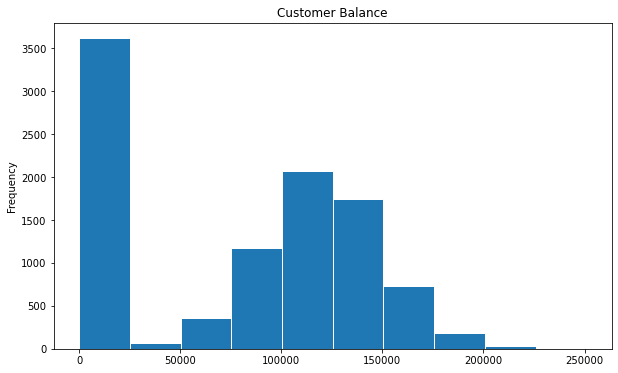

In [36]:
df['Balance'].plot(kind='hist', figsize=(10,6),
                   edgecolor="white",
                   title='Customer Balance')

### 27. Reducing the decimal points of floats
Pandas may display an excessive amount of decimal points for floats. We can easily adjust it using the `round()` function.

In [37]:
df_new.round(1)
#number of desired decimal points

,Geography,Exited,Balance
0,France,0.0,60316.8
1,France,1.0,71133.0
2,Germany,0.0,119406.1
3,Germany,1.0,120361.1
4,Spain,0.0,59710.6
5,Spain,1.0,72513.4


### 30. Filtering based on strings
We may need to filter observations (rows) based on textual data such as the name of customers. I’ve added made-up names to the df_new dataframe.

Let’s select the rows in which the customer name `startswith` ‘Mi’.
We will use the startswith method of the str accessor.

In [38]:
df_new[df_new.Geography.str.startswith("Ger")]

,Geography,Exited,Balance
2,Germany,0.0,119406.107904
3,Germany,1.0,120361.063251
